# Assignment 2
**CS283 Computer Vision, Harvard University, Fall 2019**

**Due Wednesday, Sep. 25, at 5:00pm**

Name: Natalia Pacheco-Tallaj

---

This assignment deals with projective transformations. It is *substantially* longer than Assignment One, and we strongly recommend that you complete Questions 1 and 2 in the first few days after its release. As usual, there is a helpful **Hints and Information** section at the end of this document. 

As always, your submission must follow the Submission Guidelines and take the form of a single Jupyter notebook (<tt>.ipynb</tt>), an HTML version of the notebook (<tt>.html</tt>), and accompanying <tt>./data</tt> and <tt>./src</tt> and possibly <tt>./img</tt> folders. (The <tt>./src</tt> folder will be empty this week.)

In cases where we ask for a function to be implemented, you may also implement additional helper functions either inside the function itself (locally) or outside it (globally). If you do it globally, please implement the function in the same cell.

In Questions 3 and 4, you will be computing and applying planar projective transformations to images. There are existing functions that can do some of this for you, but since we want you to write your own code, you are not allowed to use
them.  Specifically, the geometric transformation functions from OpenCV such as <tt>cv2.warpPerspective()</tt>, <tt>cv2.getPerspectiveTransform()</tt> and <tt>cv2.findHomography()</tt> are to be avoided.

In what follows, the notation is such that $\bf x$ and $\tilde{\bf x}$ indicate homogeneous and inhomogeneous vectors, respectively.

In [84]:
# Run this cell (only once) to install the unzip command
! sudo apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
The following packages were automatically installed and are no longer required:
  libpython3.6-dev linux-aws-headers-4.15.0-1040 linux-aws-headers-4.15.0-1044
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 135 not upgraded.


In [ ]:
# Extract required pset folders (make sure you ran the first cell first)
! unzip pset2.zip
! mv pset2/* .
! rm -d pset2

Archive:  pset2.zip
replace pset2/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [84]:
# Import any required libraries here
import cv2                # OpenCV
import numpy as np        # numpy
import scipy.interpolate  # interpolation, used for questions 2, 3 and 4

# Use this line to make matplotlib plot inline (only need to call it once when importing matplotlib)
%matplotlib inline

import matplotlib.pyplot as plt
# Modify this line to adjust the displayed plot size. You can also call
# it with different parameters before specific plots.
plt.rcParams['figure.figsize'] = [10, 10]

print("done")

done


## Question 1 (20 points)

A similarity transformation is a composition of a rotation, translation, and scaling.  In the special case of no rotation, a similarity can be written
\begin{equation}
\left(\begin{array}{c} x' \\ y' \\ 1\end{array}\right)=
\left[\begin{array}{ccc} s & 0 & t_x \\ 0 & s & t_y \\ 0 & 0 & 1\end{array}\right]
\left(\begin{array}{c} x \\ y \\ 1\end{array}\right),
\end{equation}
where, as usual, '$=$' indicates equality up to scale. In matrix notation, this is written ${\bf x}'={\bf T}{\bf x}$.

**a.** Suppose you are given a set of $N$ inhomogeneous points $\tilde{\bf x}_i=(x_i,\ y_i)^\top$, $i=1\ldots N$. Write expressions for $s$, $t_x$ and $t_y$ in the equation above such that the set of points $\{\tilde{\bf x}_i\}$ is mapped to the set of points $\{\tilde{\bf x}'_i\}$ with the following properties.
- The centroid of the points $\{\tilde{\bf x}'_i\}$ is the origin, $(0,\ 0)^\top$.
- The average distance from the origin to points $\{\tilde{\bf x}'_i\}$ is $\sqrt{2}$.
 

### Answer:
Let
\begin{align*}
    x_{avg} &= \frac{1}{N}\sum x_i\\
    y_{avg} &= \frac{1}{N}\sum y_i
\end{align*}
so that $(x_{avg}, y_{avg})$ is the centroid of the set of points $\{\tilde{x}_i\}$. 
Let 
$$d_i = \sqrt{(x_i - x_{avg})^2 + (y_i - y_{avg})^2} $$
be the distance from $\tilde{x}_i$ to the centroid of $\{\tilde{x}_i\}$ and let
$$d_{avg} = \frac{1}{N}\sum d_i $$
be the average distance to the centroid. 
I claim that the desired transformation is
$$\begin{pmatrix}
    \frac{\sqrt{2}}{d_{avg}} & 0 & -\frac{\sqrt{2}}{d_{avg}}x_{avg}\\
    0 & \frac{\sqrt{2}}{d_{avg}} & -\frac{\sqrt{2}}{d_{avg}}y_{avg}\\
    0 & 0 & 1
\end{pmatrix}$$
In order to show that this transformation satisfies the desired properties, notice that
$$\begin{pmatrix}
    \frac{\sqrt{2}}{d_{avg}} & 0 & -\frac{\sqrt{2}}{d_{avg}}x_{avg}\\
    0 & \frac{\sqrt{2}}{d_{avg}} & -\frac{\sqrt{2}}{d_{avg}}y_{avg}\\
    0 & 0 & 1
\end{pmatrix}\begin{pmatrix} x_i \\ y_i \\ 1\end{pmatrix} = \begin{pmatrix}\frac{\sqrt{2}}{d_{avg}} (x_i - x_{avg})\\ \frac{\sqrt{2}}{d_{avg}} (y_i - y_{avg}) \\ 1\end{pmatrix}$$
So $x_i' = \frac{\sqrt{2}}{d_{avg}} (x_i - x_{avg})$ and $y_i' = \frac{\sqrt{2}}{d_{avg}} (y_i - y_{avg})$. Now the centroid of the set $\{\tilde{x}'_i\}$ is, in inhomogeneous coordinates:
\begin{align*}
    \left(\frac{1}{N}\sum x_i' , \frac{1}{N} \sum y_i'\right) &= \left(\frac{1}{N}\sum \left(\frac{\sqrt{2}}{d_{avg}} (x_i - x_{avg})\right), \frac{1}{N}\sum \left(\frac{\sqrt{2}}{d_{avg}} (y_i - y_{avg})\right) \right)\\
    &= \left(\frac{1}{N} \frac{\sqrt{2}}{d_{avg}}\left(\sum x_i - \sum x_{avg}\right), \frac{1}{N} \frac{\sqrt{2}}{d_{avg}}\left(\sum y_i - \sum y_{avg}\right)\right)\\
    &= \left(\frac{1}{N} \frac{\sqrt{2}}{d_{avg}}\left(\sum x_i - Nx_{avg}\right), \frac{1}{N} \frac{\sqrt{2}}{d_{avg}}\left(\sum y_i - N y_{avg}\right)\right)\\
    &= \left(\frac{\sqrt{2}}{d_{avg}}\frac{1}{N} \sum x_i - \frac{\sqrt{2}}{d_{avg}}x_{avg}, \frac{\sqrt{2}}{d_{avg}}\frac{1}{N} \sum y_i - \frac{\sqrt{2}}{d_{avg}}y_{avg}\right)\\
    &= \left(\frac{\sqrt{2}}{d_{avg}} x_{avg} - \frac{\sqrt{2}}{d_{avg}}x_{avg}, \frac{\sqrt{2}}{d_{avg}} y_{avg} - \frac{\sqrt{2}}{d_{avg}}y_{avg}\right)\\
    &= (0,0)
\end{align*}
So the centroid of $\{\tilde{x}'_i\}$ is $(0,0)$.

The distance of $\tilde{x}_i'$ to the origin is
$$d_i' = \sqrt{x_i'^2 + y_i'^2} =  \sqrt{\left(\frac{\sqrt{2}}{d_{avg}}\right)^2 (x_i - x_{avg})^2 + \left(\frac{\sqrt{2}}{d_{avg}}\right)^2 (y_i - y_{avg})^2} = \frac{\sqrt{2}}{d_{avg}}\sqrt{(x_i - x_{avg})^2 +(y_i - y_{avg})^2} = \frac{\sqrt{2}}{d_{avg}} d_i$$
So the average distance to the origin of the points $\{\tilde{x}'_i\}$ is 
$$\frac{1}{N}\sum d_i' = \frac{1}{N}\sum \frac{\sqrt{2}}{d_{avg}} d_i = \frac{\sqrt{2}}{d_{avg}}\frac{1}{N}\sum d_i = \frac{\sqrt{2}}{d_{avg}}d_{avg} = \sqrt{2} $$
as we wanted. 


**b.** Write a Python function <tt>getT(X1)</tt> that takes an $N\times 2$
arrays of points (where each row is $(x_i,y_i)$) and returns the $3\times 3$ similarity matrix $\bf T$ defined above.

*Hint: Make sure the returned matrix is of the correct <tt>dtype</tt> (for example <tt>np.float32</tt>). Additionally, pay close attention to the differences between <tt>numpy.matrix</tt> and <tt>numpy.array</tt> (both of which may be used, yet have different properties).*

In [85]:
def getT(X1):
    # average first column and second column, i.e. the x and y coordinates
    xavg = np.swapaxes(X1, 0, 1)[0].sum() / float(len(X1))
    yavg = np.swapaxes(X1, 0, 1)[1].sum() / float(len(X1))    
    
    # average of array of distances from each point to the centroid
    # and generate the distance multiplyer s
    davg = np.average([np.linalg.norm(x) for x in X1 - [xavg, yavg]])
    s = np.sqrt(2) / davg
    
    return np.array([[s, 0, -s * xavg], [0, s, -s * yavg], [0, 0, 1]])

**c.** Test your function using the following code cell. In addition, write a brief description of the operations being performed in lines three and four.

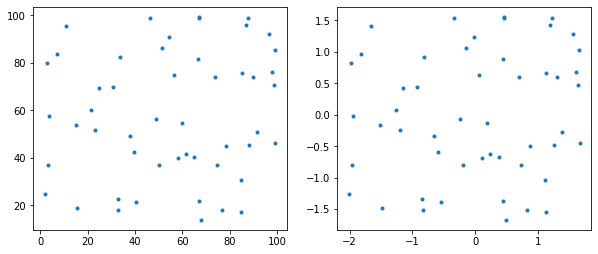

In [86]:
X = np.random.rand(50, 2) * 100  # 50 random points in square [0,100]x[0,100]
T = getT(X)

# Next two lines are explained in the cell below, as the problem required
Xn = T.dot(np.concatenate([X.transpose(), np.ones((1, 50), dtype=np.float32)], axis=0)).transpose()
Xni = Xn[:, :2] / Xn[:, 2:]  # Note the difference between Xn[:, 2:] and Xn[:, 2]!

fig = plt.figure()
plt.subplot(1, 2, 1, aspect='equal')
plt.plot(X[:, 0], X[:, 1], '.')
plt.subplot(1, 2, 2, aspect='equal')
plt.plot(Xni[:, 0], Xni[:, 1], '.');


### Answer:

The first line is applying the transformation given by the matrix $T$ to all of the points in $X$ as follows: first it is taking the transpose of $X$ which is the $2\times N$ matrix
$$\begin{pmatrix} x_1 & x_2 & \ldots & x_N \\ y_1 & y_2 & \ldots & y_N\end{pmatrix} $$
and concatenating a row of $1$'s at the end to homogenize the points (this is what the concatenate function does, and the axis = 0 just means we are concatenating rows). Then it's multiplying the $3\times 3$ matrix $T$ by the $3\times N$ matrix of homogeneous points
$$T\begin{pmatrix} x_1 & x_2 & \ldots & x_N \\ y_1 & y_2 & \ldots & y_N\\ 1 & 1 & \ldots & 1\end{pmatrix} $$ 
which is what the dot function does. Lastly it's taking the transpose of the resulting matrix so that each row is one of the image points. 

The second line is giving $N\times 2$ matrix that takes the first two elements of each row of $Xn$ ($Xn[:, :2]$) and divides them by the last element of that row ($Xn[:, 2:]$), so it's simply dehomogenizing all the points in the matrix $Xn$. 

## Question 2 (20 points)

A homography relating two images can be estimated from four or more pairs of corresponding points.  When these four points correspond to known metric points on a plane, such a homography can be used to remove projective distortion via metric rectification.
  
**a.** Write a function <tt>getH(X1, X2)</tt> that takes two $N\times 2$
  arrays of image coordinates (where each row is $(x_i,y_i)$) and
  returns the $3\times 3$ homography matrix that maps points in the
  first image (<tt>X1</tt>) to corresponding points in the second (<tt>X2</tt>). Use your
  function <tt>getT()</tt> from Problem 1 to
  implement normalization as discussed in Sect. 4.4.4 (and
  Algorithm 4.2) of Hartley & Zisserman.

In [131]:
def DLT(x1, x2):
    # add rows of 1s
    X1 = np.transpose(np.concatenate([np.transpose(x1), [np.ones(len(x1))]]))
    X2 = np.transpose(np.concatenate([np.transpose(x2), [np.ones(len(x2))]]))

    # For each correspondence xi <--> xi', 
    # assemble the matrices Ai into a 2n x 9 matrix
    # note that, following the book's notation, wi'=wi=1
    A = np.concatenate(
    [np.concatenate(
        [[np.concatenate([np.zeros(3), -X1[i], X2[i][1]*X1[i]])],
         [np.concatenate([X1[i], np.zeros(3), -X2[i][0]*X1[i]])]
        ]) for i in range(len(X1))], axis=0)
    
    # SVD
    _, _, V = np.linalg.svd(A)

    # Extract last column of V matrix
    h = V[-1,:]
    
    return h.reshape(3,3)

def getH(X1, X2):
    # Normalization for x
    T1 = getT(X1)    
    X1n = T1.dot(np.concatenate([X1.transpose(), np.ones((1, len(X1)), dtype=np.float32)], axis=0)).transpose()
    X1ni = X1n[:, :2] / X1n[:, 2:]

    # Normalization for x'
    T2 = getT(X2)
    X2n = T2.dot(np.concatenate([X2.transpose(), np.ones((1, len(X2)), dtype=np.float32)], axis=0)).transpose()
    X2ni = X2n[:, :2] / X2n[:, 2:]
    
    # Run DLT on normalized point sets
    HH = DLT(X1ni, X2ni)
    
    # Denormalize: H = T2^{-1} * HH * T1
    # i.e. solve T2 * H = HH * T1 for H
    H = np.linalg.lstsq(T2, np.dot(HH, T1))[0]
    
    return H



**b.** Write a function <tt>applyH(Iin, H)</tt> that computes a new image by applying the homography <tt>H</tt> to an image <tt>Iin</tt>. The resolution of the output image should (on average) be comparable to that of <tt>Iin</tt>, and the horizontal and vertical limits of the output image plane should be large enough to include all mapped pixels from <tt>Iin</tt>.  Pixels in <tt>Iout</tt> that do not correspond to any point in <tt>Iin</tt> should be set to zero (black).

Hint: The function <tt>scipy.interpolate.RegularGridInterpolator()</tt> may be useful.

In [132]:
# apply homography H to single-channel image Iin
def applyH(Iin, H):
    # width and height
    h, w = Iin.shape[0], Iin.shape[1]
    
    # Compute bounds of new image by computing where the corners go
    corners = np.concatenate([np.array([[0.],[0.],[1.]]), 
                              np.array([[0.],[h - 1.],[1.]]), 
                              np.array([[w - 1.], [0.],[1.]]), 
                              np.array([[w - 1.], [h - 1.],[1.]])], axis=1)
    newcorners = np.dot(H, corners)
    xmin, xmax = np.amin(newcorners[0]/newcorners[2]), np.amax(newcorners[0]/newcorners[2])
    ymin, ymax = np.amin(newcorners[1]/newcorners[2]), np.amax(newcorners[1]/newcorners[2])
    
    # set resuolution
    num_x_points = w
    num_y_points = h
    
    # Create regularly-spaced grid of (x,y)-pixel coordinates
    # corresponding to the outpput image
    x, y = np.meshgrid(np.linspace(xmin, xmax, num_x_points), np.linspace(ymin, ymax, num_y_points))

    # Reshape them and stack so that a homography can be applied to all points in parallel
    X = np.stack([x.flatten(), y.flatten()])
    
    # Get inverse images of this regular grid under H
    xh = np.linalg.lstsq(H, np.concatenate([X, [np.ones(len(X[0]))]]))[0]
    Xh = xh[:2] / xh[2]

    # Get interpolator 
    interpolator = scipy.interpolate.RegularGridInterpolator((np.arange(num_y_points), np.arange(num_x_points)), 
                                                             Iin, bounds_error=False, 
                                                             fill_value=np.nan)

    # Interpolate I to get intensity values at image points Xh.
    # the interpolator is defined using (y,x)-pixel coordinates so we need to swap x and y in Xh
    # We also need to transpose Xh to be a list [[x1, y1], [x2, y2], ...] instead of
    # [[x1,x2,...],[y1,y2,...]]
    Iout = interpolator(np.transpose(np.array([Xh[1], Xh[0]])))
    
    # Reshape intensity vector into image with correct height and width
    Iout = np.reshape(Iout, (num_y_points, num_x_points))

    # Points in Xh that are outside the boundaries of the image are assigned
    # value np.nan, which means 'not a number'. The final step is to
    # set the intensities at these points to zero.
    # (Another possible solution is defining fill_value=0 in scipy.interpolate.RegularGridInterpolator.)
    Iout[Iout == np.nan] = 0
                      
    return Iout

**c.** The image <tt>MaxwellDworkin_01.jpg</tt> is available in the <tt>./data</tt> folder. Using your new functions <tt>getT()</tt>, <tt>getH()</tt>, and <tt>applyH()</tt>, along with some manually-identified points in that image, compute and display a metric rectification of the image. Use the fact that the aspect ratio of the grey bricks, when measured on the building with a tape measure, is $2.5\!\!:\!\!1$. For your convenience, the code cell below includes some manually selected image points (<tt>points1</tt>) and their corresponding coordinates in the rectified coordinate system (<tt>points2</tt>).

/usr/share/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/share/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


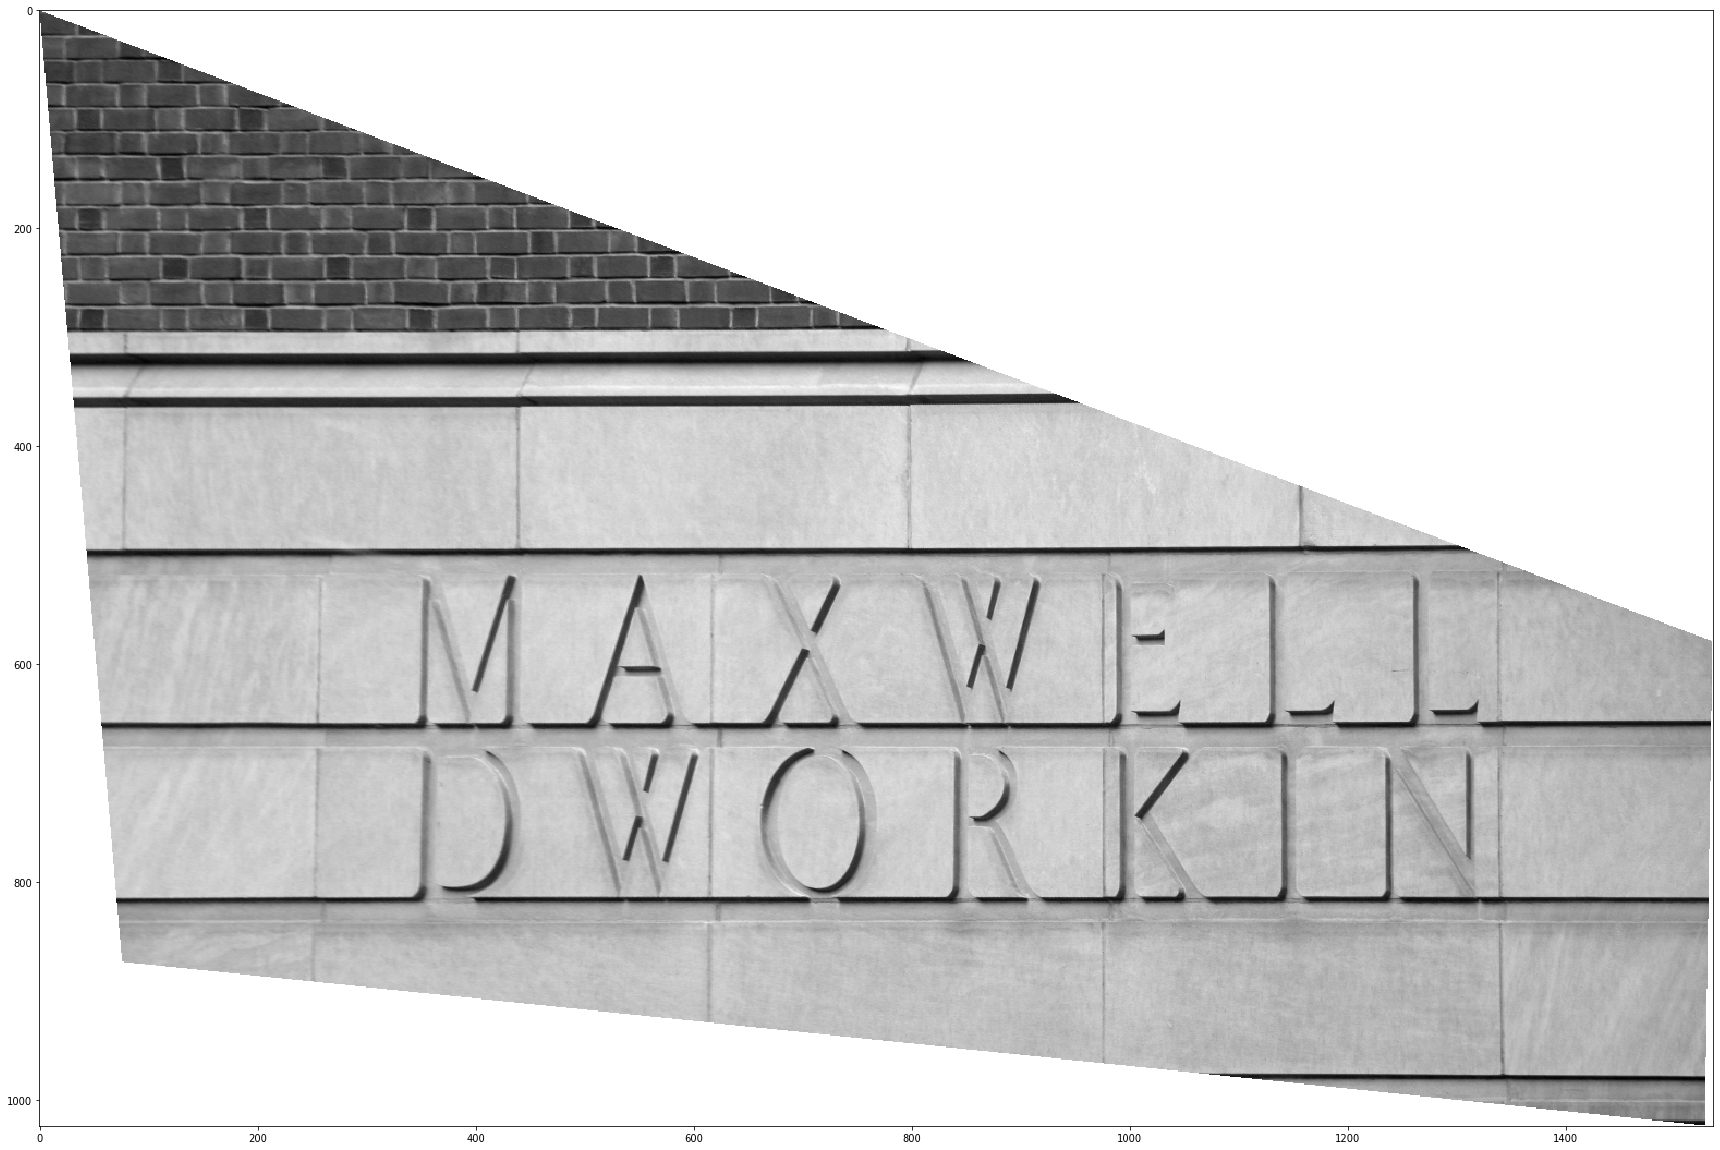

In [133]:
# Corresponding points (points1 are image coordinates and points2 are in the rectified image)
points1 = np.array([[117,  379,  720,  1197, 1197, 718,  372,  111],
                    [738,  643,  519,  343,  627,  757,  850,  922]], dtype=np.float32).transpose()

points2 = np.array([[0.0,  2.5,  5.0,  7.5,  7.5,  5.0,  2.5,  0.0],
                    [0.0,  0.0,  0.0,  0.0,  1.0,  1.0,  1.0,  1.0]], dtype=np.float32).transpose()

# read image in black and white since applyH only accepts 1 channel
Iin = cv2.imread('./data/MaxwellDworkin_01.jpg',0)


H = getH(points1, points2)
Iout = applyH(Iin, H)
plt.imshow(Iout, cmap='gray')

## Question 3 (15 points)

Homographies can also be used to create a panoramic image by blending together multiple photographs captured with the same center of projection.

**a.** Write a function <tt>applyH2(I1, I2, I3, H12, H32)</tt> that computes a panoramic image by: (1) applying the homography <tt>H12</tt> to image <tt>I1</tt>, (2) applying homography <tt>H32</tt> to image <tt>I3</tt>, and (3) blending these together with image <tt>I2</tt>. The resolution of the output image should (on average) be comparable to that of <tt>I2</tt>, and the horizontal and vertical limits of the output image plane should be large enough to include all mapped pixels from <tt>I1</tt> and <tt>I3</tt>.  Pixels in <tt>Iout</tt> that do not correspond to any point in the pre-image of <tt>Iout</tt> should be set to zero (black). You can blend the overlapping regions of the mapped images using any simple method you prefer (e.g., choosing for each pixel in the overlap region the color from one of the overlapping images, or averaging the colors from both of the overlapping images).

In [125]:
def applyH2(I1, I2, I3, H12, H32):
    h1, w1 = I1.shape[0], I1.shape[1]
    h2, w2 = I2.shape[0], I2.shape[1]
    h3, w3 = I3.shape[0], I3.shape[1]
    
    # Compute bounds of new image by computing where the corners of I1, I2, I3 go
    corners1 = np.concatenate([np.array([[0.],[0.],[1.]]), 
                              np.array([[0.],[h1 - 1.],[1.]]), 
                              np.array([[w1 - 1.], [0.],[1.]]), 
                              np.array([[w1 - 1.], [h1 - 1.],[1.]])], axis=1)
    newcorners1 = np.dot(H12, corners1)
    corners3 = np.concatenate([np.array([[0.],[0.],[1.]]), 
                              np.array([[0.],[h3 - 1.],[1.]]), 
                              np.array([[w3 - 1.], [0.],[1.]]), 
                              np.array([[w3 - 1.], [h3 - 1.],[1.]])], axis=1)
    newcorners3 = np.dot(H32, corners3)
    
    xmin1, xmax1 = np.amin(newcorners1[0]/newcorners1[2]), np.amax(newcorners1[0]/newcorners1[2])
    ymin1, ymax1 = np.amin(newcorners1[1]/newcorners1[2]), np.amax(newcorners1[1]/newcorners1[2])
    xmin2, xmax2, ymin2, ymax2 = 0, w2, 0, h2
    xmin3, xmax3 = np.amin(newcorners3[0]/newcorners3[2]), np.amax(newcorners3[0]/newcorners3[2])
    ymin3, ymax3 = np.amin(newcorners3[1]/newcorners3[2]), np.amax(newcorners3[1]/newcorners3[2])

    xmin, xmax = min(xmin1, xmin2, xmin3), max(xmax1, xmax2, xmax3)
    ymin, ymax = min(ymin1, ymin2, ymin3), max(ymax1, ymax2, ymax3)

    # we are joining the images horizontally so width should add and height 
    # should remain the same
    num_x_points = w1 + w2 + w3
    num_y_points = max([h1, h2, h3])
    
    # create the regular grid for the output image
    x, y = np.meshgrid(np.linspace(xmin, xmax, num_x_points), np.linspace(ymin, ymax, num_y_points))

    # Reshape them and stack so that a homography can be applied to all points in parallel
    X = np.stack([x.flatten(), y.flatten()])

    # compute inverse image of output grid in I1, I2, I3 respectively
    xh1 = np.linalg.lstsq(H12, np.concatenate([X, [np.ones(len(X[0]))]]))[0]
    Xh1 = xh1[:2] / xh1[2]
    Xh2 = X
    xh3 = np.linalg.lstsq(H32, np.concatenate([X, [np.ones(len(X[0]))]]))[0]
    Xh3 = xh3[:2] / xh3[2]

    # generate the interpolators for each of the images then interpolate 
    # to get intensity values at the image points of each photo
    # set fill_value to 0 for black background
    interpolator1 = scipy.interpolate.RegularGridInterpolator((np.arange(h1), np.arange(w1)), 
                                                                 I1, bounds_error=False, 
                                                                 fill_value=0)
    Iout1 = interpolator1(np.transpose(np.array([Xh1[1], Xh1[0]])))
    interpolator2 = scipy.interpolate.RegularGridInterpolator((np.arange(h2), np.arange(w2)), 
                                                                 I2, bounds_error=False, 
                                                                 fill_value=0)
    Iout2 = interpolator2(np.transpose(np.array([Xh2[1], Xh2[0]])))
    interpolator3 = scipy.interpolate.RegularGridInterpolator((np.arange(h3), np.arange(w3)), 
                                                             I3, bounds_error=False, 
                                                             fill_value=0)
    Iout3 = interpolator3(np.transpose(np.array([Xh3[1], Xh3[0]])))
    
    # reshape
    Iout1 = np.reshape(Iout1, (num_y_points,num_x_points))
    Iout2 = np.reshape(Iout2, (num_y_points,num_x_points))
    Iout3 = np.reshape(Iout3, (num_y_points,num_x_points))

    # overlay the three images by taking maximum value between the three 
    # arrays at each pixel
    Iout = np.maximum(np.maximum(Iout1, Iout2), Iout3)
    return Iout

**b.** Test your new <tt>applyH2()</tt> function by creating a panorama from the three <tt>quad_x.jpg</tt> images in the <tt>./data</tt> folder. For this, you should use the center image <tt>quad_middle.jpg</tt> as image <tt>I2</tt>. In the cell below we have included a list of manually-selected matches between each pair of adjacent images (see plot after running the cell).

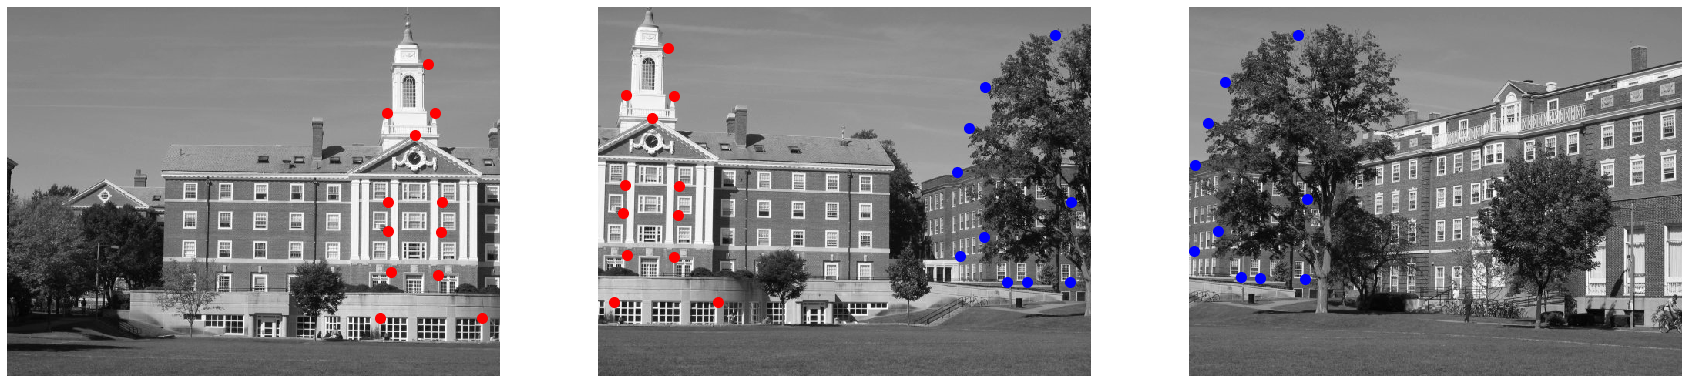

In [126]:
# Here we define the manually-identified matches, using the following variables:
#  X12: Nx2 array of points in quad_left that match points in quad_middle
#  X21: Nx2 array of points in quad_middle that match points in quad_left
#  X23: Mx2 array of points in quad_middle that match points in quad_right
#  X32: Mx2 array of points in quad_right that match points in quad_middle

X12 = np.array([[546,  493,  555,  530,  495,  565,  495,  564,  499,  560,  484,  617],
                [74,   138,  138,  167,  253,  253,  291,  292,  345,  348,  405,  405]], dtype=np.float32).transpose()
X21 = np.array([[91,   36,   98,   70,   34,   105,  32,   103,  37,    98,  20,   155],
                [53,   114,  116,  145,  231,  233,  268,  271,  323,  325,  383,  383]], dtype=np.float32).transpose()
X23 = np.array([[593,  503,  482,  466,  470,  501,  531,  557,  613,  614],
                [37,   104,  157,  214,  324,  299,  358,  357,  358,  253]], dtype=np.float32).transpose()
X32 = np.array([[142,  47,   24,   7,    6,    37,   67,   92,   150,  153],
                [36,   98,   151,  205,  317,  291,  351,  353,  354,  250]], dtype=np.float32).transpose()


# Plot points overlaid on images
plt.rcParams['figure.figsize'] = [30, 30]
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(cv2.imread('./data/quad_left.jpg'), cv2.COLOR_BGR2GRAY), cmap='gray')
plt.plot(X12[:, 0], X12[:, 1], 'or', markersize=10)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(cv2.imread('./data/quad_middle.jpg'), cv2.COLOR_BGR2GRAY), cmap='gray')
plt.plot(X21[:, 0], X21[:, 1], 'or', markersize=10)
plt.plot(X23[:, 0], X23[:, 1], 'ob', markersize=10)
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(cv2.imread('./data/quad_right.jpg'), cv2.COLOR_BGR2GRAY), cmap='gray')
plt.plot(X32[:, 0], X32[:, 1], 'ob', markersize=10);
plt.axis('off');
plt.show()

**b. (continued)** In the next cell, use calls to your function <tt>getH()</tt> to estimate the homographies <tt>H12</tt> and <tt>H32</tt> from the correspondences defined in <tt>X12</tt>, <tt>X21</tt>, <tt>X32</tt> and <tt>X23</tt>. Then run <tt>applyH2()</tt> on the three quad images using the estimated homographies <tt>H12</tt> and <tt>H32</tt> to generate a panorama of the three images.

/usr/share/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/share/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/share/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise

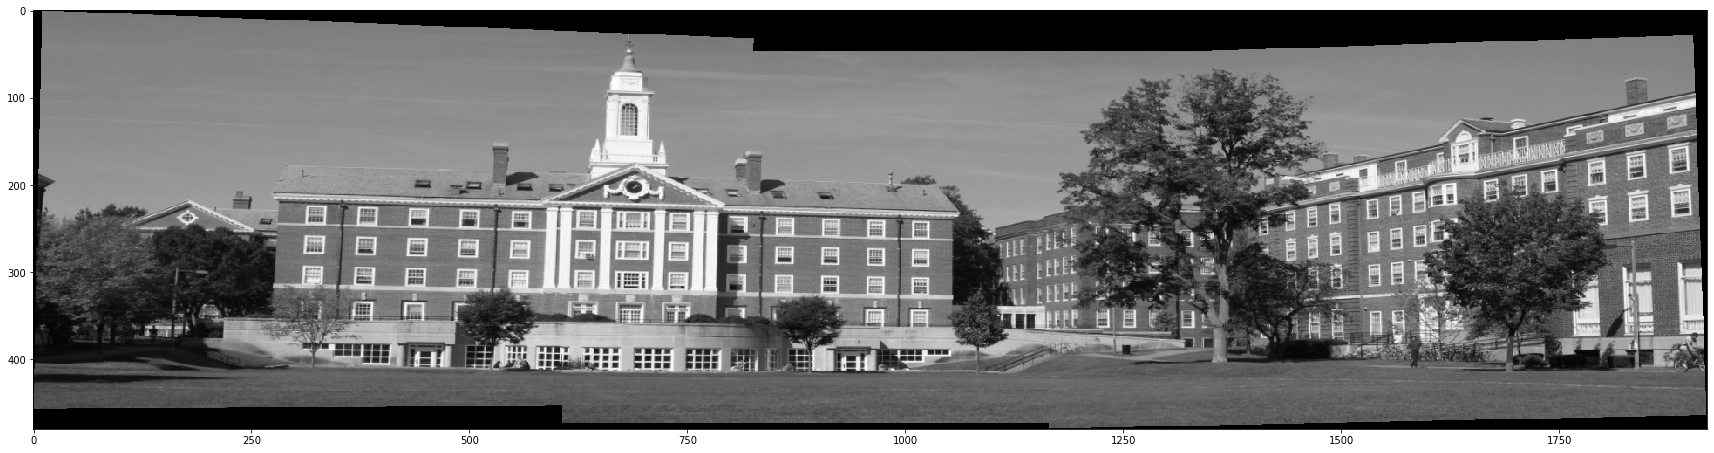

In [127]:
# All the default code is using graysclae so I'm going to assume
# we only have to do this in grayscale

H12 = getH(X12, X21)
H32 = getH(X32, X23)

I1 = cv2.imread('./data/quad_left.jpg',0)
I2 = cv2.imread('./data/quad_middle.jpg',0)
I3 = cv2.imread('./data/quad_right.jpg',0)

Iout = applyH2(I1, I2, I3, H12, H32)
plt.imshow(Iout, cmap='gray')


## Question 4 (15 points)

Your next task is to build on your functions above to handle noisy correspondences between pairs of images, such as those produced by completely automated systems that detect "interest points" in an image and then match these points between images. The correspondences that are produced by these systems contain outliers, which you must identify and eliminate using RANSAC. 

**a.** Write a function <tt>ransacH(X1, X2)</tt> that takes $N$ correspondences, in the form of two $N\times 2$ arrays of corresponding image coordinates, and returns a $3\times 3$ homography matrix. Each pair of corresponding rows in the input (<tt>X1(i,:)</tt>, <tt>X2(i,:)</tt>) represents a correspondence, and some of these correspondences are outliers. Your function must use RANSAC to identify the subset of inlying correspondences, and return a $3\times 3$ homography matrix that maps inlying points of <tt>X1</tt> to the corresponding points in <tt>X2</tt>. You should follow Algorithm 4.4 of Hartley & Zisserman, using a call to your function <tt>getH()</tt> in step (i).


In [137]:
num_iter = 1000
inlier_threshold = 10

def ransacH(X1, X2, N = num_iter, t = inlier_threshold, T = .95):
    # make sure t is big enough for something that comes later
    t = max(1, t)
    
    # get target size of consensus set (stopsize) 
    numpts = len(X1)
    stopsize = T * numpts
    
    # initialize the variables to use in the iteration
    max_consensus = 0
    max_consensus_H = np.array([[0,0,0], [0,0,0], [0,0,0]])
    
    # choice of points
    choice_space = np.array(range(numpts))
    
    # while less than N iterations
    its = 0
    while its < N:
        # select 4 random points
        i,j,k,m = np.random.choice(choice_space, 4, replace=False)
        # fit the model to those points
        H = getH(np.concatenate([[X1[i]], [X1[j]], [X1[k]], [X1[m]]]),
                 np.concatenate([[X2[i]], [X2[j]], [X2[k]], [X2[m]]]))
        # determine consensus set
        # get list of distances of each point in X2 to the corresponding
        # image of a point in X1 under H
        HX1 = np.dot(H, np.concatenate([np.transpose(X1), [np.ones(len(X1))]]))
        HX1 = (HX1[:2]/HX1[2]).transpose()

        norms = np.sum(np.abs(X2-HX1)**2, axis=-1)**(1./2)
        
        # put ones for each thing within the treshold, zeroes for each thing not within it
        # for this to work t needs to be >= 1
        norms[norms <= t] = 1
        norms[norms > t] = 0
        # get size of consensus set
        consensus = np.sum(norms)
        if consensus > max_consensus:
            max_consensus = consensus
            max_consensus_H = H
        its += 1
        if max_consensus >= stopsize:
            its = N
    
    # get the valid points in the consensus set
    HX1 = np.dot(max_consensus_H, np.concatenate([np.transpose(X1), [np.ones(len(X1))]]))
    HX1 = (HX1[:2]/HX1[2]).transpose()
    
    norms = np.sum(np.abs(X2-HX1)**2, axis=-1)**(1./2)
    norms[norms <= t] = 1
    norms[norms > t] = 0
    
    # valid points are those where the norms list has a 1
    VP1 = X1[norms == 1]
    VP2 = X2[norms == 1]
    
    assert(max_consensus == len(VP1))
        
    return getH(VP1, VP2)
    

 **b.** The following cell uses ["scale-invariant feature transform"](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html) (SIFT) to obtain keypoints and descriptors for each of the three quad images. It then find matches from the keypoints of <tt>quad_middle.jpg</tt> to <tt>quad_left.jpg</tt> (and vice versa) and from the keypoints of <tt>quad_middle.jpg</tt> to <tt>quad_right.jpg</tt> (and vice versa). It does so in a brute-force method by mapping each point in the first image to its closest descriptor in the second image (in an $\ell_2$ sense). It then prunes the keypoints to only include symmetric matches, and keeping only the best $400$ matches.

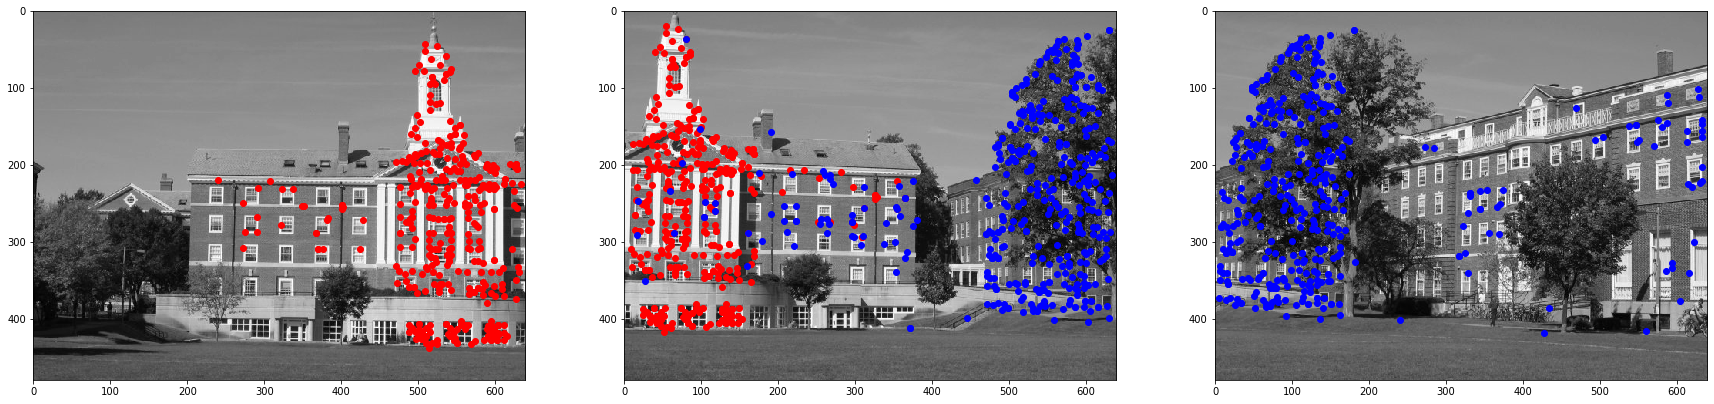

In [138]:
# First load the three images and convert to grayscale
im1_gray = cv2.cvtColor(cv2.imread('./data/quad_left.jpg'), cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(cv2.imread('./data/quad_middle.jpg'), cv2.COLOR_BGR2GRAY)
im3_gray = cv2.cvtColor(cv2.imread('./data/quad_right.jpg'), cv2.COLOR_BGR2GRAY)

# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Get SIFT keypoints and descriptors for each image
kp1, des1 = sift.detectAndCompute(im1_gray, None)
kp2, des2 = sift.detectAndCompute(im2_gray, None)
kp3, des3 = sift.detectAndCompute(im3_gray, None)

# Create a BF matcher object using the L2 norm
bf = cv2.BFMatcher(cv2.NORM_L2)

# Match descriptors (in both directions) between each pair of adjacent images
matches12 = bf.match(des1, des2)
matches21 = bf.match(des2, des1)
matches32 = bf.match(des3, des2)
matches23 = bf.match(des2, des3)

# Prune keypoints to make sure matches are symmetric (i.e. only include matches which are 1-to-1)
matches12_sym = []
for i in range(len(matches12)):
    j = matches12[i].trainIdx
    # Only include j if it maps back to i
    if matches21[j].trainIdx == i:
        matches12_sym.append((i, j))
matches32_sym = []
for i in range(len(matches32)):
    j = matches32[i].trainIdx
    # Only include j if it maps back to i
    if matches23[j].trainIdx == i:
        matches32_sym.append((i, j))

N = 400  # Number of matches to use in each image pair
# Find the N pairs with the lowest symmetric distance in each image pair
matches12_sym = sorted(matches12_sym, key=lambda x: matches12[x[0]].distance + matches21[x[1]].distance)[:N]
matches32_sym = sorted(matches32_sym, key=lambda x: matches32[x[0]].distance + matches23[x[1]].distance)[:N]

# Get coordinates
X12 = np.array([kp1[i].pt for i, _ in matches12_sym])
X21 = np.array([kp2[j].pt for _, j in matches12_sym])
X32 = np.array([kp3[i].pt for i, _ in matches32_sym])
X23 = np.array([kp2[j].pt for _, j in matches32_sym])

# Plot points
plt.rcParams['figure.figsize'] = [30, 30]
plt.subplot(1, 3, 1)
plt.imshow(im1_gray, cmap='gray')
plt.plot(X12[:, 0], X12[:, 1], 'or')
# plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(im2_gray, cmap='gray')
plt.plot(X21[:, 0], X21[:, 1], 'or')
plt.plot(X23[:, 0], X23[:, 1], 'ob')
# plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(im3_gray, cmap='gray')
plt.plot(X32[:, 0], X32[:, 1], 'ob');
# plt.axis('off');

**b. (continued)** In the following cell, test your <tt>ransacH()</tt> function by creating another panorama from the three <tt>quad_x.jpg</tt> images in the <tt>./data</tt> folder, this time using the noisy correspondences computed using the scheme above and stored in <tt>X12</tt>, <tt>X21</tt>, <tt>X32</tt> and <tt>X23</tt>. Similar to Question 3, you should use the center image <tt>quad_middle.jpg</tt> as image <tt>I2</tt>, but this time use calls to <tt>ransacH()</tt> for estimating the homographies <tt>H12</tt> and <tt>H32</tt> from the noisy correspondences.

/usr/share/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/share/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/share/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise

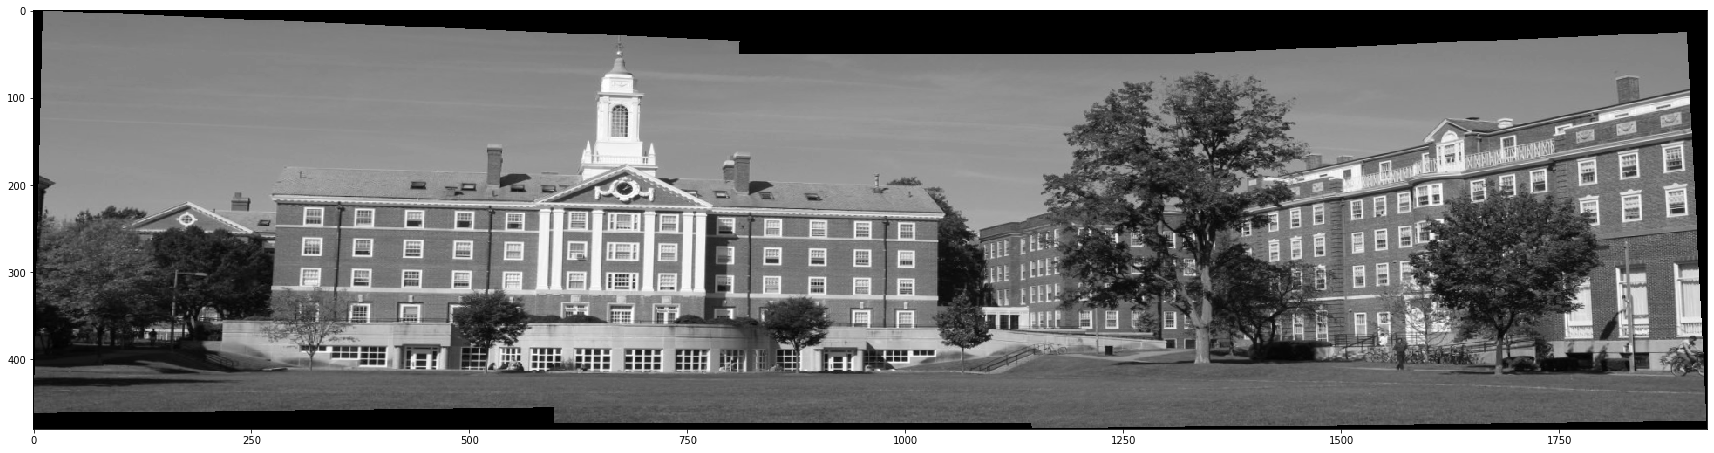

In [139]:
H12 = ransacH(X12, X21)
H32 = ransacH(X32, X23)

I1 = cv2.imread('./data/quad_left.jpg',0)
I2 = cv2.imread('./data/quad_middle.jpg',0)
I3 = cv2.imread('./data/quad_right.jpg',0)

Iout = applyH2(I1, I2, I3, H12, H32)
plt.imshow(Iout, cmap='gray')


## Hints and Information
To apply homography $\bf H$ to image $I$, you actually need to operate in reverse. Typically, you:
1) apply $\bf H$ to the corners of $I$ to determine the horizontal and vertical limits of the output image,
2) generate a regular grid of $(x,y)$ coordinates (with appropriate resolution) containing this output range (see <tt>numpy.linspace()</tt> and <tt>numpy.meshgrid()</tt>),
3) apply ${\bf H}^{-1}$ to your grid of coordinates to find the corresponding locations in $I$ (using <tt>numpy.linalg.lstsq()</tt> in order to avoid numerical issues with computing ${\bf H}^{-1}$), and
4) sample $I$ at these (generally non-integer) points, using an interpolation function (e.g. <tt>scipy.interpolate.RegularGridInterpolator()</tt>).

Here is some skeleton code that demonstrates some of the functions mentioned above:

```python
# Create regularly-spaced grid of (x,y)-pixel coordinates
x, y = np.meshgrid(np.linspace(xmin, xmax, num_x_pts), np.linspace(ymin, ymax, num_y_pts))
  
# Reshape them and stack so that a homography can be applied to all points in parallel
X = np.stack([x.flatten(), y.flatten()])

# [Apply a homography to homogeneous coordinates corresponding to `X'. ]
# [Compute inhomogeneous coordinates of mapped points.                 ]
# [Save result in Nx2 matrix named `Xh'.                               ]

# Get interpolator (note that I must be a single channel and not a 3-channel color image)
interpolator = scipy.interpolate.RegularGridInterpolator((np.arange(num_y_pts), np.arange(num_x_pts)),
                                                         I, bounds_error=False, fill_value=np.nan)

# Interpolate I to get intensity values at image points Xh.
# Note: the way interpolator is defined is using (y,x)-pixel coordinates so we need to swap x and y in Xh
Ih = interpolator(Xh[:, ::-1])

# Reshape intensity vector into image with correct height and width
Ih = np.reshape(Ih, (num_y_pts,num_x_pts)

# Points in Xh that are outside the boundaries of the image are assigned
# value np.nan, which means 'not a number'. The final step is to
# set the intensities at these points to zero.
# (Another possible solution is defining fill_value=0 in scipy.interpolate.RegularGridInterpolator.)
Ih[Ih == np.nan] = 0
```

***

When working with numpy, loops should be avoided. Numpy functions which operate directly on matrices and vectors can process them in parallel with much less overhead, which results in significantly faster implementations. In general, the numpy functions <tt>numpy.reshape()</tt>, <tt>numpy.transpose()</tt>, <tt>numpy.where()</tt>, <tt>numpy.repeat()</tt>, <tt>numpy.stack()</tt>, <tt>numpy.concatenate</tt> and the <tt>.flatten()</tt> method of numpy arrays are very useful. Additionally, [broadcasting](https://docs.scipy.org/doc/numpy-1.15.0/user/basics.broadcasting.html) is an extremely helpful tool which can be used very effectively.
  

Here is a simple comparison between performing vectorized operations using numpy functions and itertively doing the same operations:

In [ ]:
import time

# Create random matrix and vector
N = 1000
mat = np.random.rand(N, N) / N ** 2
vec = np.random.rand(N,)

# Multiply the ith row of the matrix by the ith element of the vector and sum the result
# a. Iterative
res = 0.0
t0 = time.time()
for i in range(N):
    for j in range(N):
        res += mat[i, j] * vec[i]
print("Iterative version:  result is {:.5f} (computed in {:.5f} seconds)".format(res, time.time() - t0))

# b. Vectorized
t0 = time.time()
res = (mat * vec[:, np.newaxis]).sum()
print("Vectorized version: result is {:.5f} (computed in {:.5f} seconds)".format(res, time.time() - t0))

Although this example is very simple, the speedup factor is over 250 (when run on JupyterHub). It may be even bigger in other more realistic use cases.

# My Unit Tests

In [137]:
# TESTING DLT
H = [[np.random.randint(-10, 11),np.random.randint(-10, 11),np.random.randint(-10,11)],
     [np.random.randint(-10, 11),np.random.randint(-10, 11),np.random.randint(-10,11)],
     [np.random.randint(-10, 11),np.random.randint(-10, 11),np.random.randint(-10,11)]]
num_pts = 9
# build set of points
points1 = [[],[]]
for i in range(num_pts):
    points1[0].append(np.random.randint(100))
    points1[1].append(np.random.randint(100))

points2= np.dot(H, np.concatenate([np.array(points1), [np.ones(num_pts)]]))
points2 = points2[:2]/points2[2]

HH = DLT(np.transpose(points1), np.transpose(points2))
# check they are equal up to scaling
print(HH/H)
print("done")

[[0.05241424 0.05241424 0.05241424]
 [0.05241424 0.05241424 0.05241424]
 [0.05241424 0.05241424 0.05241424]]
done


In [50]:
# TESTING getH
# homography
H = [[1,1,0],[0,1,0],[0,0,1]]
num_pts = 4
# build set of points
# points1 = [[],[]]
# for i in range(num_pts):
#     points1[0].append(np.random.randint(100))
#     points1[1].append(np.random.randint(100))

points1 = [[0,0,-np.sqrt(2), np.sqrt(2)],[np.sqrt(2), -np.sqrt(2), 0,0]]
points2 = np.dot(H, np.concatenate([np.array(points1), [np.ones(num_pts)]]))
points2 = points2[:2]/points2[2]

X1 = np.transpose(points1)
X2 = np.transpose(points2)

# Normalization for x
T1 = getT(X1)    
X1n = T1.dot(np.concatenate([X1.transpose(), np.ones((1, len(X1)), dtype=np.float32)], axis=0)).transpose()
X1ni = X1n[:, :2] / X1n[:, 2:]

# Normalization for x'
T2 = getT(X2)
X2n = T2.dot(np.concatenate([X2.transpose(), np.ones((1, len(X2)), dtype=np.float32)], axis=0)).transpose()
X2ni = X2n[:, :2] / X2n[:, 2:]

print(X1ni)
print(X2ni)
HH = DLT(X1ni, X2ni)
print(HH)
    
# Denormalize
# Ok now I need to solve T2 * H = HH * T1 for H
# can express HH*T1 as a length 9 vector and T2 * H as a 9x9 matrix 
# acting on a length 9 vector, then use the least squares algorithm
HH = np.linalg.lstsq(T2, np.dot(HH, T1))[0]
print(HH)
print(H/HH)

[[ 0.          1.41421356]
 [ 0.         -1.41421356]
 [-1.41421356  0.        ]
 [ 1.41421356  0.        ]]
[[ 1.17157288  1.17157288]
 [-1.17157288 -1.17157288]
 [-1.17157288  0.        ]
 [ 1.17157288  0.        ]]
[[ 4.73667384e-01  4.73667384e-01  7.38531113e-17]
 [-5.22101660e-17  4.73667384e-01  1.54949867e-16]
 [ 4.37755933e-17  1.28446212e-16  5.71767111e-01]]
[[ 5.71767111e-01  5.71767111e-01  8.91485915e-17]
 [-6.30232454e-17  5.71767111e-01  1.87041036e-16]
 [ 4.37755933e-17  1.28446212e-16  5.71767111e-01]]
[[ 1.74896384  1.74896384  0.        ]
 [-0.          1.74896384  0.        ]
 [ 0.          0.          1.74896384]]


/usr/share/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [ ]:
# STEP BY STEP PANORAMA ASSEMBLY 

H12 = getH(X12, X21)
H32 = getH(X32, X23)

I1 = cv2.imread('./data/quad_left.jpg',0)
I2 = cv2.imread('./data/quad_middle.jpg',0)
I3 = cv2.imread('./data/quad_right.jpg',0)

h1, w1 = I1.shape[0], I1.shape[1]
h2, w2 = I2.shape[0], I2.shape[1]
h3, w3 = I3.shape[0], I3.shape[1]

# Compute bounds of new image by computing where the corners go
corners1 = np.concatenate([np.array([[0.],[0.],[1.]]), 
                          np.array([[0.],[h1 - 1.],[1.]]), 
                          np.array([[w1 - 1.], [0.],[1.]]), 
                          np.array([[w1 - 1.], [h1 - 1.],[1.]])], axis=1)
newcorners1 = np.dot(H12, corners1)
corners3 = np.concatenate([np.array([[0.],[0.],[1.]]), 
                          np.array([[0.],[h3 - 1.],[1.]]), 
                          np.array([[w3 - 1.], [0.],[1.]]), 
                          np.array([[w3 - 1.], [h3 - 1.],[1.]])], axis=1)
newcorners3 = np.dot(H32, corners3)

# print(H12)
# XX = np.dot(H12, np.concatenate([X12.transpose(), [np.ones(len(X12))]]))
# print(XX/XX[2])
# print(H32)

xmin1, xmax1 = np.amin(newcorners1[0]/newcorners1[2]), np.amax(newcorners1[0]/newcorners1[2])
ymin1, ymax1 = np.amin(newcorners1[1]/newcorners1[2]), np.amax(newcorners1[1]/newcorners1[2])
xmin2, xmax2, ymin2, ymax2 = 0, w2, 0, h2
xmin3, xmax3 = np.amin(newcorners3[0]/newcorners3[2]), np.amax(newcorners3[0]/newcorners3[2])
ymin3, ymax3 = np.amin(newcorners3[1]/newcorners3[2]), np.amax(newcorners3[1]/newcorners3[2])

xmin, xmax = min(xmin1, xmin2, xmin3), max(xmax1, xmax2, xmax3)
ymin, ymax = min(ymin1, ymin2, ymin3), max(ymax1, ymax2, ymax3)

print((w1, w2, w3))
num_x_points = w1 + w2 + w3
# num_y_points = h1 + h2 + h3
num_y_points = max([h1, h2, h3])

x, y = np.meshgrid(np.linspace(xmin, xmax, num_x_points), np.linspace(ymin, ymax, num_y_points))

# Reshape them and stack so that a homography can be applied to all points in parallel
X = np.stack([x.flatten(), y.flatten()])

xh1 = np.linalg.lstsq(H12, np.concatenate([X, [np.ones(len(X[0]))]]))[0]
Xh1 = xh1[:2] / xh1[2]
Xh2 = X
xh3 = np.linalg.lstsq(H32, np.concatenate([X, [np.ones(len(X[0]))]]))[0]
Xh3 = xh3[:2] / xh3[2]

interpolator1 = scipy.interpolate.RegularGridInterpolator((np.arange(h1), np.arange(w1)), 
                                                             I1, bounds_error=False, 
                                                             fill_value=0)
Iout1 = interpolator1(np.transpose(np.array([Xh1[1], Xh1[0]])))
interpolator2 = scipy.interpolate.RegularGridInterpolator((np.arange(h2), np.arange(w2)), 
                                                             I2, bounds_error=False, 
                                                             fill_value=0)
Iout2 = interpolator2(np.transpose(np.array([Xh2[1], Xh2[0]])))
interpolator3 = scipy.interpolate.RegularGridInterpolator((np.arange(h3), np.arange(w3)), 
                                                         I3, bounds_error=False, 
                                                         fill_value=0)
Iout3 = interpolator3(np.transpose(np.array([Xh3[1], Xh3[0]])))

Iout1 = np.reshape(Iout1, (num_y_points,num_x_points))
Iout2 = np.reshape(Iout2, (num_y_points,num_x_points))
Iout3 = np.reshape(Iout3, (num_y_points,num_x_points))


Iout = np.maximum(np.maximum(Iout1, Iout2), Iout3)
plt.imshow(Iout, cmap='gray')
# plt.imshow(Iout2, cmap='gray')
# plt.imshow(Iout3, cmap='gray')

In [39]:
# TESTING ransacH
H = [[np.random.randint(-10, 11),np.random.randint(-10, 11),np.random.randint(-10,11)],
     [np.random.randint(-10, 11),np.random.randint(-10, 11),np.random.randint(-10,11)],
     [np.random.randint(-10, 11),np.random.randint(-10, 11),np.random.randint(-10,11)]]
num_pts = 100
num_outliers = 20
box_size = 100
# build set of points
points1 = [[],[]]
for i in range(num_pts):
    points1[0].append(np.random.randint(-box_size, box_size + 1))
    points1[1].append(np.random.randint(-box_size, box_size + 1))

points2= np.dot(H, np.concatenate([np.array(points1), [np.ones(num_pts)]]))
points2 = points2[:2]/points2[2]

# sprinkle in some outliers
for i in range(num_outliers):
    np.append(points1[0], np.random.randint(-box_size, box_size + 1))
    np.append(points1[1], np.random.randint(-box_size, box_size + 1))
    np.append(points2[0], np.random.randint(-box_size, box_size + 1))
    np.append(points2[1], np.random.randint(-box_size, box_size + 1))

HH = ransacH(np.transpose(points1), np.transpose(points2))

print(H)
print(HH)

# check constant ratio
print(HH/H)
    

[[-9, 10, 7], [2, -10, 2], [6, -7, -6]]
[[-0.01435234  0.01594704  0.01116293]
 [ 0.00318941 -0.01594704  0.00318941]
 [ 0.00956823 -0.01116293 -0.00956823]]
[[0.0015947 0.0015947 0.0015947]
 [0.0015947 0.0015947 0.0015947]
 [0.0015947 0.0015947 0.0015947]]


/usr/share/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
